In [1]:
import importlib

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

from Utils import paths
from Utils import transformation_utils as t_utils

importlib.reload(paths)
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [2]:
fhr = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/fhr.pickle")
uc = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/uc.pickle")
y = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/y.pickle")

fhr.shape, uc.shape, y.shape

((552, 21620), (552, 21620), (552,))

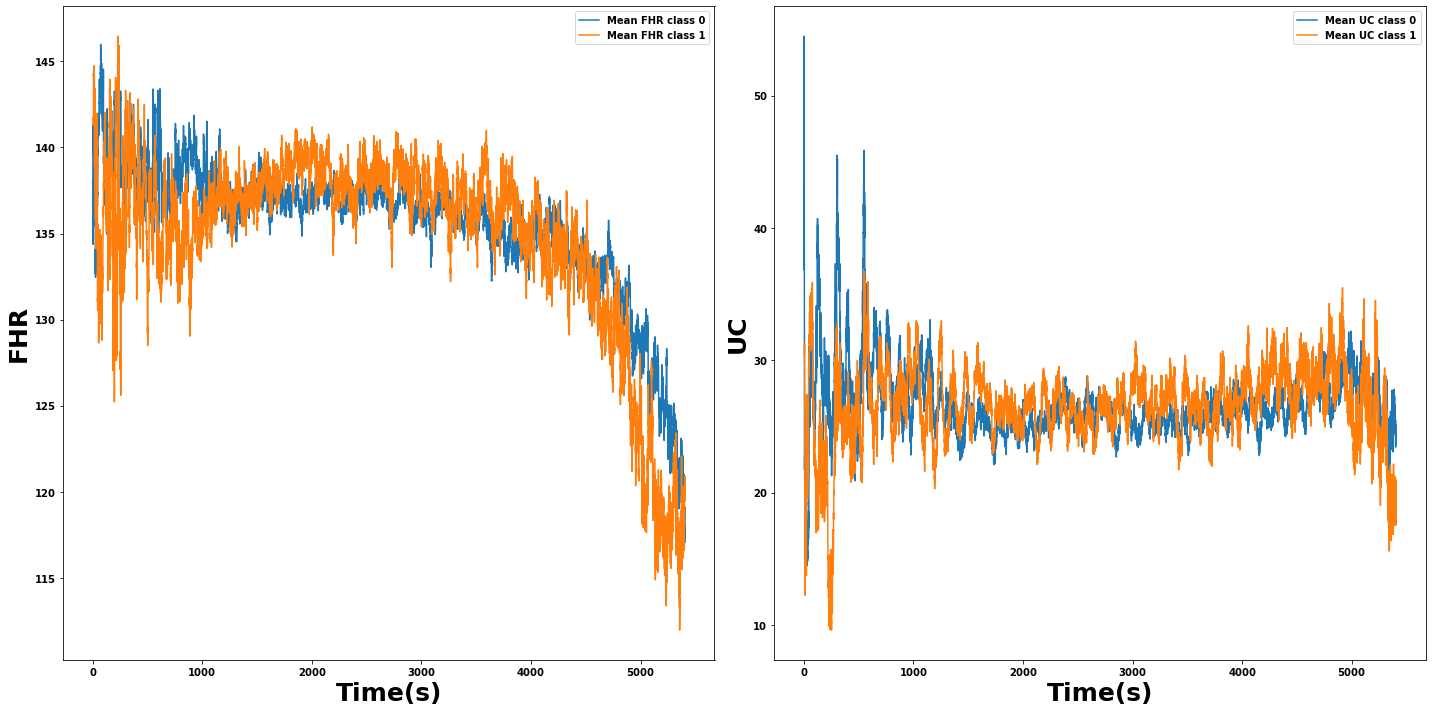

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].plot(fhr[y == 0].mean().index, fhr[y == 0].mean().values, label='Mean FHR class 0')
ax[0].plot(fhr[y == 1].mean().index, fhr[y == 1].mean().values, label='Mean FHR class 1')
ax[1].plot(uc[y == 0].mean().index, uc[y == 0].mean().values, label='Mean UC class 0')
ax[1].plot(uc[y == 1].mean().index, uc[y == 1].mean().values, label='Mean UC class 1')

ax[0].set_xlabel('Time(s)', fontsize=25)
ax[1].set_xlabel('Time(s)', fontsize=25)
ax[0].set_ylabel('FHR', fontsize=25)
ax[1].set_ylabel('UC', fontsize=25)
ax[0].legend()
ax[1].legend()
fig.tight_layout()

In [4]:
cc_data = dict()
lags = t_utils.calc_lags(minutes=5)

for (idx_fhr, fhr_row), (idx_uc, uc_row) in tqdm(zip(fhr.copy().iterrows(), uc.copy().iterrows()), total=len(uc)):
    fhr_signal = pd.Series(fhr_row.values)
    uc_signal = pd.Series(uc_row.values)

    cc_data[idx_fhr] = joblib.Parallel(n_jobs=8)(
        joblib.delayed(t_utils.cc)(fhr_signal, uc_signal, lag, 3000) for lag in lags
    )
cc_df = pd.DataFrame(cc_data).T
cc_df.columns = lags
cc_df
# 552/552 [05:00<00:00, 1.90it/s]

  0%|          | 0/552 [00:00<?, ?it/s]

,-1199,-1198,-1197,-1196,-1195,-1194,-1193,-1192,-1191,-1190,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
1001,-0.143611,-0.143392,-0.143133,-0.143069,-0.143331,-0.143864,-0.144430,-0.144705,-0.145320,-0.145763,...,-0.071019,-0.072023,-0.073669,-0.075269,-0.076692,-0.077778,-0.078876,-0.079965,-0.081177,-0.082298
1002,0.051316,0.048979,0.046630,0.043732,0.040791,0.037558,0.034548,0.032020,0.030232,0.027842,...,0.075747,0.077366,0.078866,0.080367,0.081703,0.082672,0.083245,0.083386,0.082942,0.081982
1003,-0.169003,-0.167530,-0.165941,-0.164509,-0.163056,-0.161751,-0.160551,-0.160393,-0.160192,-0.159970,...,0.019217,0.019540,0.019278,0.019167,0.018870,0.018258,0.017509,0.016931,0.016199,0.015650
1004,0.011775,0.010709,0.009421,0.007845,0.006370,0.005518,0.005287,0.004886,0.004552,0.004915,...,-0.135158,-0.134690,-0.133797,-0.133298,-0.132531,-0.131928,-0.131086,-0.130169,-0.129447,-0.128523
1005,-0.126280,-0.126069,-0.125784,-0.125867,-0.125825,-0.125499,-0.124934,-0.124543,-0.123750,-0.123181,...,-0.006627,-0.006341,-0.005711,-0.005226,-0.005344,-0.005489,-0.005640,-0.005584,-0.005516,-0.005679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,-0.079467,-0.077935,-0.076384,-0.074798,-0.073322,-0.071966,-0.070564,-0.069252,-0.067818,-0.066883,...,-0.209855,-0.210246,-0.210503,-0.211309,-0.211807,-0.212266,-0.213027,-0.213783,-0.214986,-0.215639
2043,0.007374,0.006142,0.004517,0.002829,0.001037,-0.000626,-0.001970,-0.002984,-0.004611,-0.006215,...,-0.178921,-0.178776,-0.178597,-0.178450,-0.177884,-0.177448,-0.176855,-0.176449,-0.175893,-0.175490
2044,0.009746,0.009735,0.009070,0.008440,0.007824,0.007105,0.006719,0.005917,0.005915,0.006205,...,0.157561,0.158602,0.159348,0.160350,0.160821,0.161080,0.161083,0.160907,0.161083,0.161616
2045,0.033712,0.032558,0.030776,0.028386,0.025563,0.022178,0.018981,0.015537,0.012145,0.008431,...,0.157266,0.157449,0.157424,0.157303,0.157174,0.156988,0.156626,0.156216,0.155449,0.154729


In [5]:
bad_idx = cc_df.index[cc_df.isna().sum(axis=1) != 0]
bad_idx

Int64Index([1104, 1119, 1134, 1149, 1155, 1158, 1186, 1188, 1258, 1292, 1322,
            1327, 1451, 1477, 1482, 2003],
           dtype='int64')

In [6]:
cc_df = cc_df.drop(bad_idx, errors='ignore')
y = y.drop(bad_idx, errors='ignore')
cc_df.shape, y.shape

((536, 2399), (536,))

In [7]:
tt = np.array(lags)

cc_0 = cc_df.copy()[y == 0]
mean_0 = cc_0.mean().values
std_0 = cc_0.std().values
max_0 = cc_0.max().values
min_0 = cc_0.min().values

cc_1 = cc_df.copy()[y == 1]
mean_1 = cc_1.mean().values
std_1 = cc_1.std().values
max_1 = cc_1.max().values
min_1 = cc_1.min().values

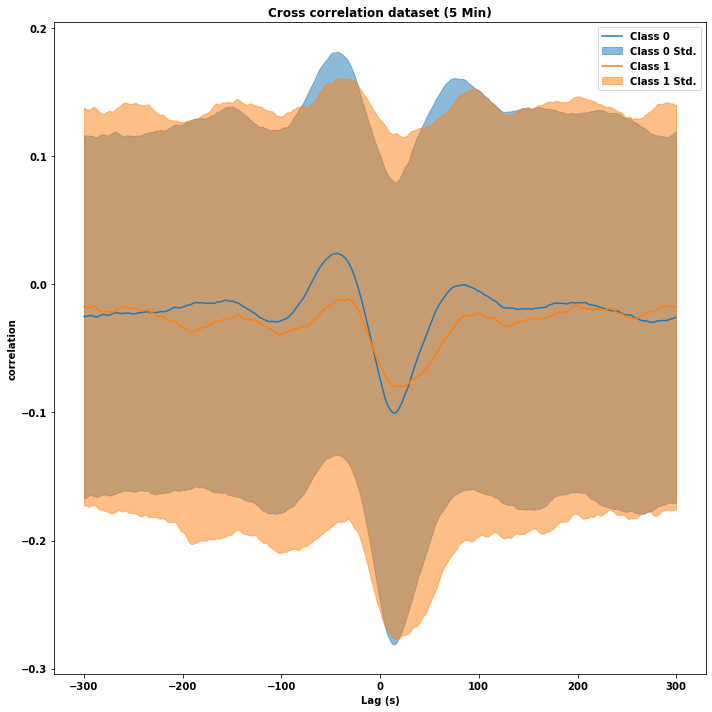

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])

ax.plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])

ax.legend(loc='best')
ax.set_title(f"Cross correlation dataset (5 Min)")
ax.set_ylabel(f"correlation")
ax.set_xlabel("Lag (s)")
fig.tight_layout()

plt.savefig(f"{paths.CC_DATA_PLOTS}/Desc_plot.png")
plt.savefig(f"{paths.CC_DATA_PLOTS}/Desc_plot.pdf")

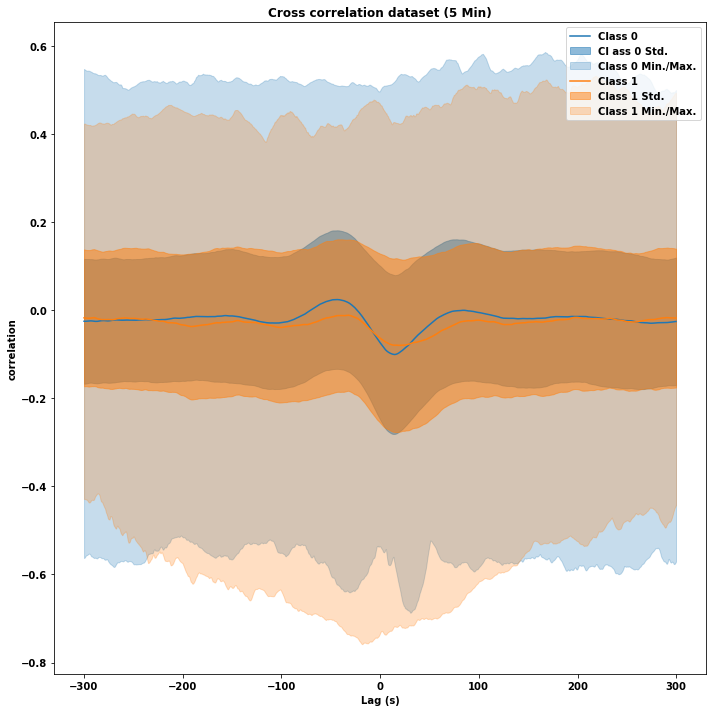

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Cl ass 0 Std.', alpha=0.5, color=COLORS[0])
ax.fill_between(tt / 4, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax.plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax.fill_between(tt / 4, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax.legend(loc='best')
ax.set_title(f"Cross correlation dataset (5 Min)")
ax.set_ylabel(f"correlation")
ax.set_xlabel("Lag (s)")
fig.tight_layout()

plt.savefig(f"{paths.CC_DATA_PLOTS}/Desc_plot_Mm.png")
plt.savefig(f"{paths.CC_DATA_PLOTS}/Desc_plot_Mm.pdf")

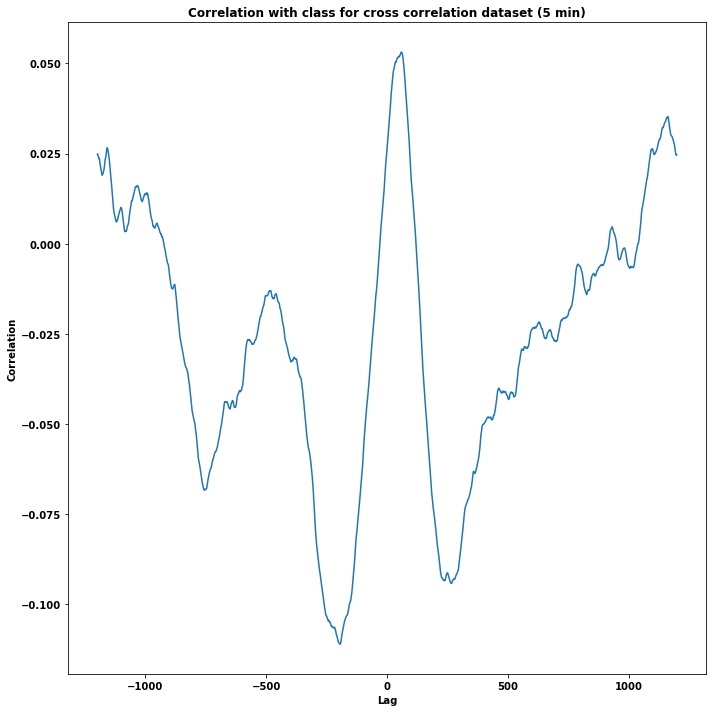

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

cc_df.corrwith(y).plot(ax=ax)

ax.set_ylabel('Correlation')
ax.set_xlabel('Lag')
ax.set_title(f'Correlation with class for cross correlation dataset (5 min)')
fig.tight_layout()

plt.savefig(f"{paths.CC_DATA_PLOTS}/Class_correlation.png")
plt.savefig(f"{paths.CC_DATA_PLOTS}/Class_correlation.pdf")

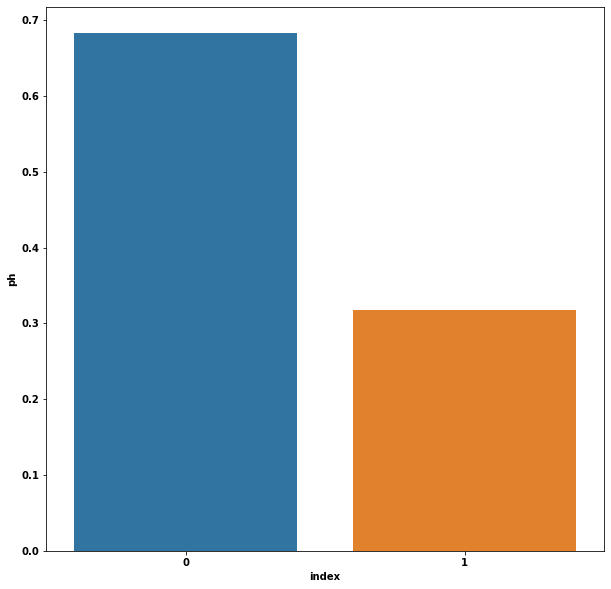

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x='index', y='ph', data=pd.DataFrame(y.value_counts(normalize=True)).reset_index())
plt.savefig(f"{paths.CC_DATA_PLOTS}/Class_Distribution.png")
plt.savefig(f"{paths.CC_DATA_PLOTS}/Class_Distribution.pdf")

In [12]:
cc_df['patologico'] = y

In [13]:
cc_df.to_csv(f"{paths.CC_DATA_PATH}/cc_dataset.csv")

In [14]:
X = cc_df.iloc[:, :-1]
X.to_pickle(f"{paths.CC_DATA_PATH}/X.pickle")
y.to_pickle(f"{paths.CC_DATA_PATH}/y.pickle")